In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
df = pd.read_csv('house_data_cleaned.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,bed_bath_sum,renovation_yes,sqft_living_plus_lot,sqft_living_plus_lot_15,lat_long,distance_from_flatiron
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,4.00,0,6830,6990,"(47.5112, -122.257)",7.714868
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,5.25,1,9812,9329,"(47.721, -122.319)",7.766476
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,3.00,0,10770,10782,"(47.7379, -122.233)",10.107949
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,7.00,0,6960,6360,"(47.5208, -122.393)",6.655340
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,5.00,0,9760,9303,"(47.6168, -122.045)",13.578402


In [4]:
df6 = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view']]

In [5]:
df6.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
0,221900.0,1180,7,1180,1340,1.00,0.0
1,538000.0,2570,7,2170,1690,2.25,0.0
2,180000.0,770,6,770,2720,1.00,0.0
3,604000.0,1960,7,1050,1360,3.00,0.0
4,510000.0,1680,8,1680,1800,2.00,0.0


In [6]:
abs(df6.corr()) > .8

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
price,True,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False
grade,False,False,True,False,False,False,False
sqft_above,False,True,False,True,False,False,False
sqft_living15,False,False,False,False,True,False,False
bathrooms,False,False,False,False,False,True,False
view,False,False,False,False,False,False,True


## Notes on above
- at .7 correlation, clearly sqft_living is the best predictor, for it is correlated with everything but view
- at .8 correlation, now sqft_living only correlate with sqft_above
- first test, remove sqft_above, and see outcome!

## Test[1] : dropping sqft_above

In [7]:
X1 = df6[['sqft_living', 'grade', 'sqft_living15', 'bathrooms',
       'view']]
y1 = df6['price']

In [8]:
predictors = np.asarray(X1) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model = sm.OLS(y1,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     5809.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:06:44   Log-Likelihood:            -2.9819e+05
No. Observations:               21597   AIC:                         5.964e+05
Df Residuals:                   21591   BIC:                         5.964e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -5.5e+05   1.29e+04    -42.756      0.000   -5.75e+05   -5.25e+05
x1           182.8500      3.596     50.851      0.000     175.802     189.898
x2          9.896e+04   2335.091     42.378      0.000    9.44e+04    1.04e+05
x3            -2.7493      3.876     -0.709      0.478     -10.347       4.849
x4         -3.059e+04   3330.820     -9.185      0.000   -3.71e+04   -2.41e+04
x5          9.579e+04   2240.663     42.751      0.000    9.14e+04       1e+05
==============================================================================
Omnibus:                    16620.975   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1088824.458
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      37.205   Cond. No.                     2.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
""" Now using Sklearn"""
ss = StandardScaler()

X1_scaled = ss.fit_transform(X1)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
np.random.seed(33)

X1_train,X1_test,y1_train,y1_test = train_test_split(X1_scaled,y1)

In [11]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lr.score(X1_test,y1_test) #r**2 value

0.5815117275967296

In [13]:
lr.coef_

array([161493.65221168, 118316.48323463,   3152.76714081, -25662.7335309 ,
        69021.0727499 ])

In [14]:
r_2 = metrics.r2_score(y1_test, lr.predict(X1_test))
vif = 1/(1-r_2)
mae = metrics.mean_absolute_error(y1_test, lr.predict(X1_test))
mse = metrics.mean_squared_error(y1_test, lr.predict(X1_test))

In [15]:
#PRICE vs. TOP 6 dropping sqft_above #test size is .25
print(f'Our list of predictors: {X1.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
The R-squared score of our test is 0.5815117275967296
The MAE score of our test is 157595.4454267423
The MSE score of our test is 60759037804.78904
The RMSE score of our test is $246493.48430493867


#### Next Steps: Run K-Fold Cross Validation for Test[1] (dropping sqft_above)

In [16]:
cv_5_results = cross_val_score(lr, X1_scaled, y1, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(lr, X1_scaled, y1, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(lr, X1_scaled, y1, cv=20, scoring="neg_mean_squared_error")

In [17]:
print(f"CV5 - MEAN of 5 RMSE's: {sqrt(-1*np.mean(cv_5_results))}")
print(f"CV10 - MEAN of 10 RMSE's: {sqrt(-1*np.mean(cv_10_results))}")
print(f"CV20 - MEAN of 20 RMSE's: {sqrt(-1*np.mean(cv_20_results))}")

CV5 - MEAN of 5 RMSE's: 240493.94515642096
CV10 - MEAN of 10 RMSE's: 240456.4610955803
CV20 - MEAN of 20 RMSE's: 240238.4621285325


##  Test[1] Observations: dropping sqft_above
- Our key metric, RMSE, went up slightly after dropping sqft_above
- Our secondary model quality metric R-squared decreased slightly after dropping sqft_above
- Our other secondary model quality metrics MSE & MAE unfortunately increased slightly after dropping sqft_above
- After testing model quality with K-folds cross validation (k=5,10,20), our model's RSME increases, indicating our benchmark model is still the superior one
- **Test 1 did not improve our model, keep sqft_above**

## Test[2]: add in 'distance_from_flatiron' (new feature engineered from lat & long)

In [18]:
X2 = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]
y2 = df['price']

In [19]:
predictors = np.asarray(X2) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model2 = sm.OLS(y2,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     6320.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:06:45   Log-Likelihood:            -2.9535e+05
No. Observations:               21597   AIC:                         5.907e+05
Df Residuals:                   21589   BIC:                         5.908e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.569e+05   1.23e+04    -20.884      0.000   -2.81e+05   -2.33e+05
x1           157.2367      3.979     39.515      0.000     149.437     165.036
x2          7.039e+04   2145.790     32.803      0.000    6.62e+04    7.46e+04
x3            41.2734      4.015     10.280      0.000      33.404      49.143
x4            39.9793      3.477     11.500      0.000      33.165      46.794
x5         -1.488e+04   2928.004     -5.083      0.000   -2.06e+04   -9144.232
x6          8.241e+04   2014.555     40.907      0.000    7.85e+04    8.64e+04
x7         -1.814e+04    227.619    -79.716      0.000   -1.86e+04   -1.77e+04
==============================================================================
Omnibus:                    19389.543   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2150446.369
Skew:                           3.880   Prob(JB):                         0.00
Kurtosis:                      51.265   Cond. No.                     3.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
""" Now using Sklearn"""
ss = StandardScaler()

X2_scaled = ss.fit_transform(X2)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
np.random.seed(33)

X2_train,X2_test,y2_train,y2_test = train_test_split(X2_scaled,y2)

In [22]:
lr.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lr.score(X2_test,y2_test) #r**2 value

0.6755779569205969

In [24]:
lr.coef_

array([ 137716.88436796,   85031.03786096,   34399.45769707,
         32262.68581817,  -13351.37300781,   59142.80946922,
       -121648.06805235])

In [25]:
r_2 = metrics.r2_score(y2_test, lr.predict(X2_test))
mae = metrics.mean_absolute_error(y2_test, lr.predict(X2_test))
mse = metrics.mean_squared_error(y2_test, lr.predict(X2_test))

In [26]:
#PRICE vs. TOP 6 + distance_from_flatiron  #test size is .25
print(f'Our list of predictors: {X2.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'distance_from_flatiron'],
      dtype='object')
The R-squared score of our test is 0.6755779569205969
The MAE score of our test is 132135.8016805119
The MSE score of our test is 47101848438.83411
The RMSE score of our test is $217029.6026786072


In [27]:
cv_5_results = cross_val_score(lr, X2_scaled, y2, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(lr, X2_scaled, y2, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(lr, X2_scaled, y2, cv=20, scoring="neg_mean_squared_error")

In [29]:
print(f"CV5 - MEAN of 5 RMSE's: {sqrt(-1*np.mean(cv_5_results))}")
print(f"CV10 - MEAN of 10 RMSE's: {sqrt(-1*np.mean(cv_10_results))}")
print(f"CV20 - MEAN of 20 RMSE's: ${sqrt(-1*np.mean(cv_20_results))}")

CV5 - MEAN of 5 RMSE's: 210789.83742773952
CV10 - MEAN of 10 RMSE's: 210801.22241987867
CV20 - MEAN of 20 RMSE's: $210691.4784360575


## Test[2] Observations: adding distance_from_flatiron

- After RSME decreases by a significant amount (approx. $30K, decrease in RSME of 12.5%)
- **Test[2] improved our model significantly, we should keep 'distance_from_flatiron' in our model**

## Reassessing correlation matrix to find the optimal next feature to drop

In [38]:
df7 = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]

In [52]:
abs(df7.corr()) > .75

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,distance_from_flatiron
price,True,False,False,False,False,False,False,False
sqft_living,False,True,True,True,True,True,False,False
grade,False,True,True,True,False,False,False,False
sqft_above,False,True,True,True,False,False,False,False
sqft_living15,False,True,False,False,True,False,False,False
bathrooms,False,True,False,False,False,True,False,False
view,False,False,False,False,False,False,True,False
distance_from_flatiron,False,False,False,False,False,False,False,True


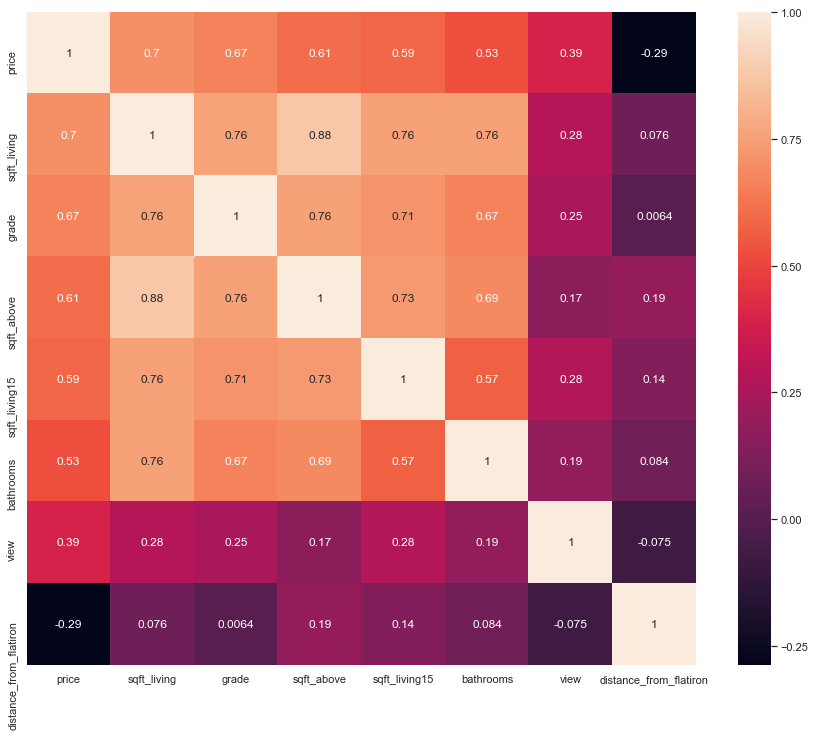

In [53]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(df7.corr(), annot=True)

- grade has high correlation with sqft_living (currently understood as our best predictor of price) and sqft_above (which Test[1] suggests we should keep in our model for now
- dropping grade may reduce our model's collinearity, let's try it!

## Test[3]: drop grade

In [54]:
X3 = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]
y3 = df['price']

In [55]:
predictors = np.asarray(X3) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model3 = sm.OLS(y3,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     6853.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:30:16   Log-Likelihood:            -2.9588e+05
No. Observations:               21597   AIC:                         5.918e+05
Df Residuals:                   21590   BIC:                         5.918e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.063e+05   5493.175     19.352      0.000    9.55e+04    1.17e+05
x1           165.1775      4.069     40.589      0.000     157.201     173.154
x2            76.5032      3.964     19.302      0.000      68.734      84.272
x3            73.6965      3.403     21.658      0.000      67.027      80.366
x4          6551.5022   2924.357      2.240      0.025     819.546    1.23e+04
x5          8.688e+04   2059.371     42.188      0.000    8.28e+04    9.09e+04
x6         -1.963e+04    228.587    -85.855      0.000   -2.01e+04   -1.92e+04
==============================================================================
Omnibus:                    17992.478   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1543550.808
Skew:                           3.502   Prob(JB):                         0.00
Kurtosis:                      43.819   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
""" Now using Sklearn"""
ss = StandardScaler()

X3_scaled = ss.fit_transform(X3)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
np.random.seed(33)

X3_train,X3_test,y3_train,y3_test = train_test_split(X3_scaled,y3)

In [58]:
lr.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
lr.score(X3_test,y3_test) #r**2 value

0.6630560547182283

In [60]:
lr.coef_

array([ 145233.21719084,   64362.99251029,   55832.88402495,
          3835.2050749 ,   62742.88991393, -131811.40052588])

In [61]:
r_2 = metrics.r2_score(y3_test, lr.predict(X3_test))
mae = metrics.mean_absolute_error(y3_test, lr.predict(X3_test))
mse = metrics.mean_squared_error(y3_test, lr.predict(X3_test))

In [62]:
#PRICE vs. TOP 7, but dropping grade #test size is .25
print(f'Our list of predictors: {X3.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
       'distance_from_flatiron'],
      dtype='object')
The R-squared score of our test is 0.6630560547182283
The MAE score of our test is 137136.4209918783
The MSE score of our test is 48919865285.35742
The RMSE score of our test is $221178.3562769138


In [63]:
cv_5_results = cross_val_score(lr, X3_scaled, y3, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(lr, X3_scaled, y3, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(lr, X3_scaled, y3, cv=20, scoring="neg_mean_squared_error")

In [64]:
print(f"CV5 - MEAN of 5 RMSE's: {sqrt(-1*np.mean(cv_5_results))}")
print(f"CV10 - MEAN of 10 RMSE's: {sqrt(-1*np.mean(cv_10_results))}")
print(f"CV20 - MEAN of 20 RMSE's: ${sqrt(-1*np.mean(cv_20_results))}")

CV5 - MEAN of 5 RMSE's: 215958.61481559623
CV10 - MEAN of 10 RMSE's: 215955.31790222926
CV20 - MEAN of 20 RMSE's: $215841.4653242048


## Test[3] Observations: dropping 'grade'

- Dropping 'grade' increased our RMSE from 210K to 215K, and dropped our R-squared slightly
- **Test[3] did not improve our model**

## Test[4]